In [1]:
from keras import backend as K
import os
from importlib import reload

def set_keras_backend(backend):

    if K.backend() != backend:
        os.environ['KERAS_BACKEND'] = backend
        reload(K)
        assert K.backend() == backend

set_keras_backend("cntk")

C:\Users\admin\Envs\deepvision\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
Using CNTK backend


In [2]:
!pip install h5py==2.8.0rc1

  Found existing installation: h5py 2.7.1
    Uninstalling h5py-2.7.1:
      Successfully uninstalled h5py-2.7.1


In [3]:
import numpy as np

import keras


In [4]:
from keras.datasets import cifar10

(pics, labels), _ = cifar10.load_data()

## LET'S GET THE IMAGES READY

In [5]:
print(pics.shape)

(50000, 32, 32, 3)


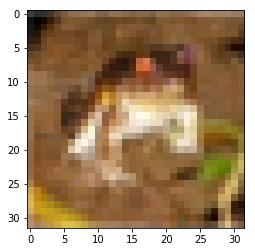

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(pics[0])

In [7]:
pics[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
pics = pics.astype('float32')
pics /= 255
pics.shape

(50000, 32, 32, 3)

In [9]:
pics[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

## NOW LET'S GET OUR LABELS PREPARED

In [10]:
print(labels[0])

[6]


The CIFAR database has labels for 10 different categories. Let's create a lookup so that we can match the labels with more human readable text.

In [11]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

number_of_classes = len(class_names)

word_label = class_names[ int(labels[0]) ]
print(word_label)

frog


Now that we have a way of getting our labels into human readable format, let's one_hot_enocode these labels so that they can be used by the A.I. for training.

In [12]:
labels = keras.utils.to_categorical(labels, number_of_classes)
print(labels[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [13]:
def labelToText(_label):
    print(class_names[np.argmax(_label)])
    
labelToText(labels[0])

frog


# BUILDING OUR MODEL

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, Activation, Dense, Flatten
# adding some additional features...
from keras.layers import MaxPooling2D, Dropout

# THIS TELLS KERAS WE WILL BE ADDING LAYERS IN ORDER
model = Sequential()

# OUR FIRST COLLECTION OF LAYERS
model.add( Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu' ))
model.add( Conv2D(32, (3,3), activation='relu' ))
model.add( MaxPooling2D( pool_size=(2,2)))
model.add( Dropout(0.25))

# SECOND LAYER, SAME AS FIRST EXCEPT FOR TWICE THE FEATURE MAPS
model.add( Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add( Conv2D(64, (3,3), activation='relu' ))
model.add( MaxPooling2D( pool_size=(2,2)))
model.add( Dropout(0.25))

# NOW LET'S START FORCING THE MODEL TO CONVERGE ON 1 of !0 CLASS NAMES
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(number_of_classes, activation='softmax'))

# OUR MODEL IS FINISHED. LET'S TELL KERAS TO COMPILE IT
model.compile( optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [15]:
batch_size = 128

def TrainingLoop(number_of_epochs):
    model.fit(pics, labels, \
              batch_size=batch_size, \
              epochs=number_of_epochs, \
              verbose=1, \
              validation_split=.1 )
    
TrainingLoop(1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/1


C:\Users\admin\Envs\deepvision\lib\site-packages\cntk\core.py:361: UserWarning: your data is of type "float64", but your input variable (uid "Input190") expects "<class 'numpy.float32'>". Please convert your data beforehand to speed up training.
  (sample.dtype, var.uid, str(var.dtype)))
C:\Users\admin\Envs\deepvision\lib\site-packages\cntk\core.py:82: RuntimeWarning: data is not C contiguous; rearrange your data/computation to avoid costly data conversions
  RuntimeWarning)


45000/45000 [==============================] - 16s 346us/step - loss: 1.6061 - acc: 0.4126 - val_loss: 1.2394 - val_acc: 0.5600


# TESTING OUR MODEL

In [16]:
test_image = pics[30]
test_image.shape

(32, 32, 3)

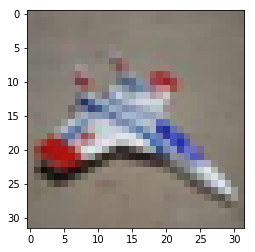

In [17]:
plt.imshow(test_image)

In [18]:
test_image_batch = np.expand_dims(test_image, axis=0)
test_image_batch.shape

(1, 32, 32, 3)

In [19]:
result = model.predict(test_image_batch, batch_size=1, verbose=1)
print(result)

1/1 [==============================] - 0s 37ms/step
[[1.7273436e-01 1.6597027e-01 5.5157347e-03 9.1741094e-04 1.0021832e-03
  3.0162808e-04 4.2811880e-04 3.2296564e-04 6.2702632e-01 2.5780933e-02]]


C:\Users\admin\Envs\deepvision\lib\site-packages\cntk\core.py:82: RuntimeWarning: data is not C contiguous; rearrange your data/computation to avoid costly data conversions
  RuntimeWarning)


In [20]:
print( class_names[np.argmax(result, axis=1)[0]] )

ship


# WE NEED A LOT MORE TRAINING...

But our computers are a bit too slow. Let's figure out how to load 'pre-trained weights' into our model.

First, let's see what I did previously (on a much faster computer with external GPU) after I loaded this Jupyter Notebook and ran TrainingLoop(10). Once I felt the A.I. model had increased in accuracy to an acceptable degree, I saved the trained weights like this:


In [21]:
# I'm commenting this out so you don't overwrite the file on your copy!
#model.save_weights('cifar_cnn_weights_final.h5')

Assuming you have code for instantiating your model, you can then load the weights you saved from one computer running this notebook, into a model with the same architecture on a different computer, by sharing the weights file and doing this:

In [22]:
model.load_weights('CNTK_cifar_cnn_weights_final.h5')

Now let's test it again, with the weights we've trained over time on a faster system.

1/1 [==============================] - 0s 24ms/step
------------------------------------------
airplane


C:\Users\admin\Envs\deepvision\lib\site-packages\cntk\core.py:82: RuntimeWarning: data is not C contiguous; rearrange your data/computation to avoid costly data conversions
  RuntimeWarning)


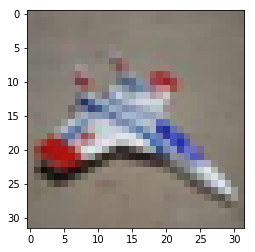

In [23]:

test_image = pics[30]

test_image_batch = np.expand_dims(test_image, axis=0)
result = model.predict(test_image_batch, batch_size=1, verbose=1)

print("------------------------------------------")
print( class_names[np.argmax(result, axis=1)[0]] )
plt.imshow(test_image)

We will use this technique of loading in pre-trained weights for a future project, where the training time would be significant and computationally expensive.